# Tugas 5 - K-Means Clustering

Nama : Saiyidati Vienna Arum Pratama  
Nim  : 200411100018  
Kelas: Penambangan Data IF 5A

>**Clustering** mengacu pada kumpulan titik data yang dikumpulkan karena kesamaan tertentu.  

>**K-Means clustering** merupakan pengelompokkan data kedalam beberapa cluster/kelompok sehingga data dalam 1 cluster memiliki tingkat kemiripan yang maksimum.  

>**Algoritma K-Means**  
 

1.   Menentukan jumlah cluster yang akan dibentuk
2.   Menentukan kelompok pusat data(centroid) secara acak
3.   Menghitung jarak  masing-masing data ke pusat cluster kemudian memasukan data tersebut ke cluster tertentu yaitu yang memiliki jarak terdekat (jarak yang nilainya rendah)  
4.   Menentukan pusat cluster baru dengan menghitung rata - rata anggota cluster  
5.   Ulangi langkah ke dan sampai anggota cluster tidak berubah

**Implementasi Code**

In [ ]:
# Import library
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#the imported dataset does not have the required column names so lets add it
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)

In [ ]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Menentukan fitur yang akan dikelompokkan.  
Fitur yang akan digunakan adalah sepal-length	sepal-width	petal-length	petal-width	

In [ ]:
irisdata_x = irisdata.iloc[:, 0:4]
irisdata_x.head()

,sepal-length,sepal-width,petal-length,petal-width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Mengubah data ke dalam bentuk array

In [ ]:
irisdata_array = np.array(irisdata_x)
print(irisdata_array)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

>Melakukan normalisasi data dengan menggunakan metode Min Max Scaler.  
Normalisasi data digunakan untuk memperkecil jarak antar sehingga memudahkan dalam proses perhitungan.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(irisdata_array)
x_scaled
dataframe= pd.DataFrame(x_scaled, columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width']) 
print (dataframe)

     sepal-length  sepal-width  petal-length  petal-width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


Menentukan dan mengonfigurasi fungsi k-means dengan mengelompokkan data menjadi 3 cluster

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)

In [ ]:
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

Menentukan nilai centroid

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[0.19611111, 0.59083333, 0.07864407, 0.06      ],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632]])

Menambahkan kolom cluster pada data

In [ ]:
irisdata["Cluster"] = kmeans.labels_

**Visualisasi Hasil Clustering**

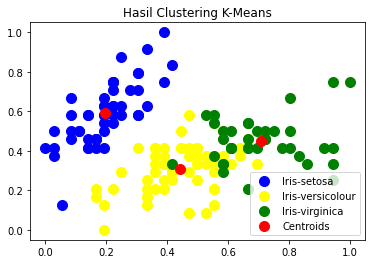

In [ ]:
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

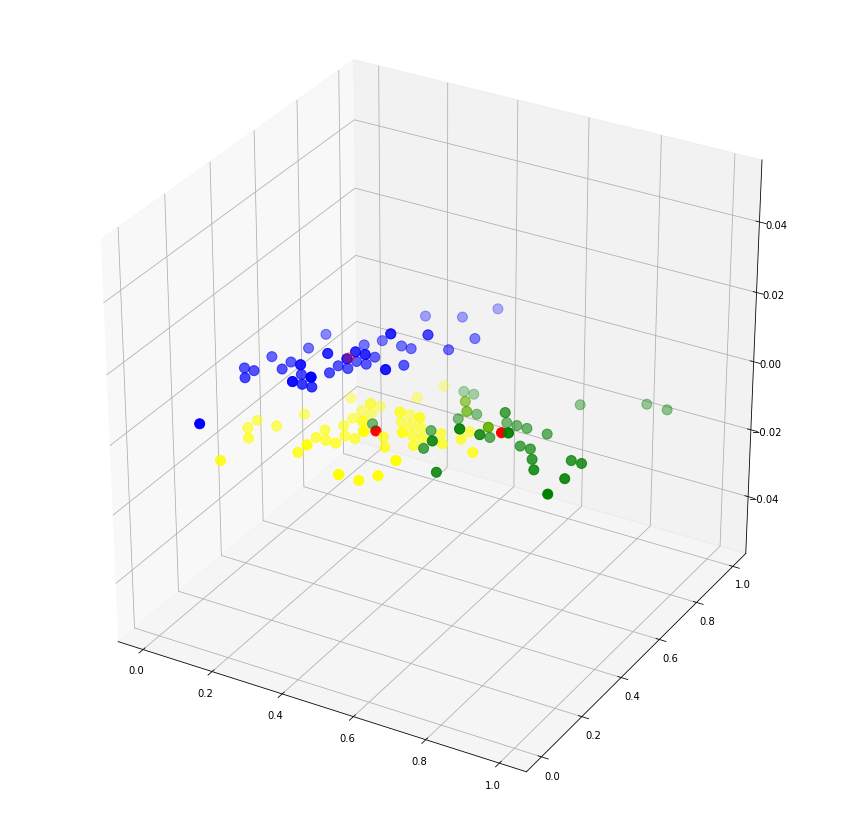

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, Y_true)

0.8933333333333333